### Download the CAncer CSV file

In [22]:
#!wget https://raw.githubusercontent.com/kurshid1991/EDA_Breast-cancer_data/refs/heads/main/README.md

### Instal;ling and importing essential packages and libraries

In [23]:
!pip install pandas seaborn matplotlib plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load the csv file in the environment

In [24]:
# load the csv file
cancerdata = pd.read_csv('breastcancerdata.csv')

### Exploring the file:

In [25]:
print(cancerdata.head())
print(cancerdata.describe())
print(cancerdata.isnull().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

### Dropping the 32nd Column from a DataFrame

In this example, we drop the 32nd column from the `cancerdata` DataFrame and reassign the modified DataFrame to the same variable.

### Explanation
- cancerdata.columns[31]: Selects the 32nd column (since Python uses zero-based indexing).
- axis=1: Specifies that we are dropping a column (not a row).
- The result is reassigned to cancerdata, ensuring that the column is permanently removed.
This method ensures that cancerdata remains updated without the dropped column.


In [26]:
cancerdata = cancerdata.drop(cancerdata.columns[32], axis=1)
print(cancerdata.head())
print(cancerdata.describe())
print(cancerdata.isnull().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

### 📊 countplot in Seaborn
The countplot function in Seaborn is used to visualize the count (frequency) of categorical data in a dataset. It creates a bar plot where the x-axis represents unique categories, and the y-axis shows their corresponding counts.

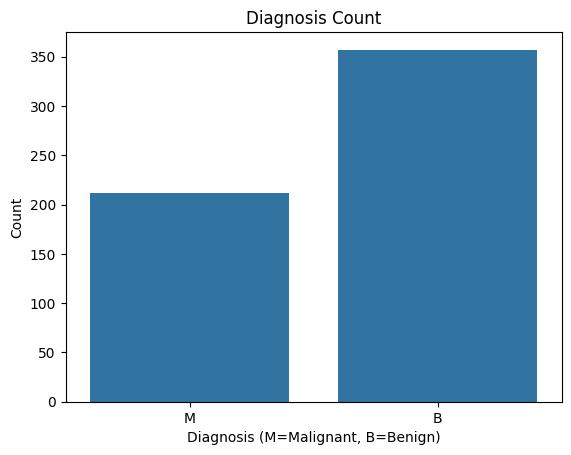

In [27]:
sns.countplot(x=cancerdata['diagnosis'])  # Ensure x is specified
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Count')
plt.show()


### 📊 Scatter Plot: Radius Mean vs. Texture Mean  

This scatter plot visualizes the relationship between **Radius Mean** and **Texture Mean** in the breast cancer dataset. The points are color-coded based on **Diagnosis** (Malignant vs. Benign).  

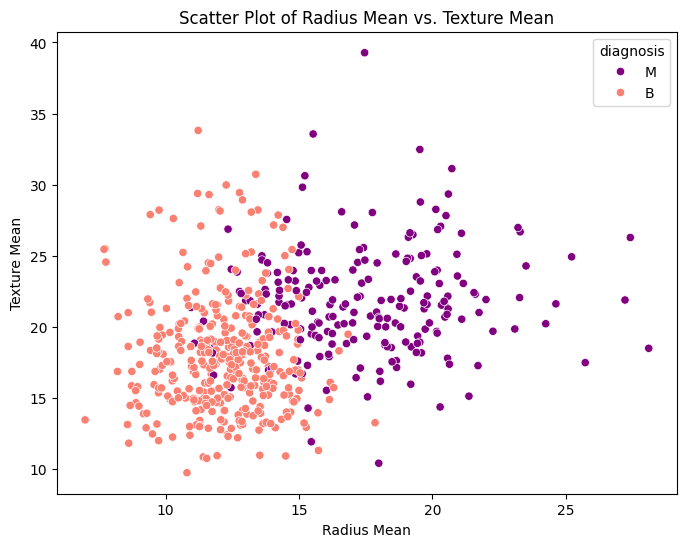

In [28]:
# Scatter plot with hue based on diagnosis
plt.figure(figsize=(8,6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=cancerdata, palette={'M': 'purple', 'B': 'salmon'})

# Labels and title
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Scatter Plot of Radius Mean vs. Texture Mean")

# Show the plot
plt.show()

 ###  🔎 Interpretation  

- The **X-axis** represents the **Radius Mean** (average distance from center to perimeter).  
- The **Y-axis** represents the **Texture Mean** (variation in pixel intensity).  
- Points are **colored based on diagnosis**:  
  - 🟣 **Purple** → Malignant (M)  
  - 🧡 **Salmon** → Benign (B)  
- If **clear clusters** form, these features may help in distinguishing between **benign and malignant** cases.  


### 📊 Observations

####  🔹 Cluster Separation: 
- **Benign samples (B)** are more concentrated on the **left side** of the plot, with **smaller radius and texture values**.  
- **Malignant samples (M)** tend to have **larger radius and texture values**, appearing more towards the **right side**.  

#### 🔹 Overlapping Region: 
- Some points in the middle **overlap**, indicating that **some benign and malignant cases share similar feature values**, making classification **more challenging** in this region.  

#### 🔹 Outliers:
- There are a few **malignant cases with very high texture values**, which might represent **highly irregular cancerous growths**.  

### 🎯 Conclusion
- The **separation** suggests that **Radius Mean** and **Texture Mean** are **useful features** for distinguishing between **benign and malignant tumors**.  
- However, due to **overlapping points**, more features (such as **perimeter, smoothness, or compactness**) should be analyzed to **improve classification accuracy**.  


### 📊 Boxplot of concavity_mean vs. diagnosis in Breast Cancer Data
A boxplot (also called a box-and-whisker plot) is used to visualize the distribution of a numerical variable and identify outliers, spread, and central tendency. It is particularly useful when comparing distributions between different categories.
- This code generates a boxplot to analyze the distribution of Concavity Mean for Benign (B) and Malignant (M) samples.

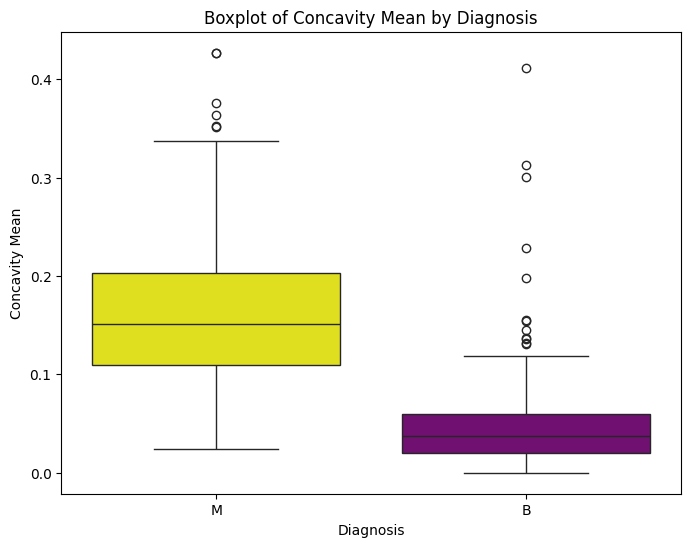

In [29]:
# Create a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='diagnosis', y='concavity_mean', data=cancerdata, hue='diagnosis', palette={'M': 'yellow', 'B': 'purple'})

# Add labels and title
plt.xlabel("Diagnosis")
plt.ylabel("Concavity Mean")
plt.title("Boxplot of Concavity Mean by Diagnosis")

# Show the plot
plt.show()

### 📊 Analysis of the Boxplot (Concavity Mean by Diagnosis)  

#### **1️⃣ Observations**  
- **Malignant (M) tumors have a higher Concavity Mean**  
  - The median **(middle line in the yellow box)** is higher for malignant cases compared to benign ones.  
  - The IQR (Interquartile Range) is also **wider**, indicating more variability.  

- **Benign (B) tumors have lower Concavity Mean**  
  - The median for **B** (purple box) is significantly lower than for **M**.  
  - The values are more tightly clustered, meaning lower variability.  

- **Outliers present in both categories**  
  - Both **M** and **B** have some outliers (points outside the whiskers).  
  - A few benign cases have **higher concavity values**, meaning some overlap exists between the two classes.  

#### **2️⃣ Interpretation**  
- **Concavity Mean is a useful feature for classification**  
  - Higher concavity is more associated with **malignant tumors**.  
  - The clear difference between the median values suggests **concavity can be a good distinguishing factor**.  

- **Some overlap and outliers exist**  
  - This means that while concavity alone is helpful, it may not be **sufficient for classification**.  
  - Additional features like **smoothness, perimeter, or texture** should be considered for better differentiation.  

#### **3️⃣ Conclusion**  
- **Malignant tumors tend to have higher and more variable concavity.**  
- **Benign tumors have a lower and more stable concavity range.**  
- **Outliers in both groups indicate that additional factors should be analyzed for improved classification.**  


Now we will create an interactive scatter plot using plotly.express (px)

In [30]:
fig = px.scatter(cancerdata, x="radius_mean", y="texture_mean", color="diagnosis", size="area_mean", hover_data=['concavity_mean'])
fig.show()

### 📊 Analysis of the Scatter Plot  

#### 🔹 Key Observations:  

1. **Cluster Separation**  
   - **Benign tumors (B - Red)** are concentrated on the **left side** (lower radius_mean).  
   - **Malignant tumors (M - Blue)** tend to have a **larger radius_mean** and spread towards the **right side**.  
   - This indicates that **larger tumors are more likely to be malignant**.  

2. **Texture Variation**  
   - Benign tumors have **lower texture_mean values**, while malignant tumors have a **wider range** of texture values.  
   - Some **overlap** is visible in the middle, suggesting that **radius_mean alone is not enough** for classification.  

3. **Bubble Size (area_mean)**  
   - The larger the bubble, the **bigger the tumor area**.  
   - Many larger bubbles appear in the malignant cluster, reinforcing the idea that **size correlates with malignancy**.  

4. **Outliers**  
   - Some points with **very high texture_mean** values are visible.  
   - These may represent highly **irregular tumors** or **unusual cases**.  

---

### 🔹 Conclusion 
✅ **Radius Mean & Texture Mean** are useful for differentiating tumors, but some **overlap exists**.  


### Pairplot of subset features
 This code generates a pairplot using Seaborn to visualize relationships between multiple tumor features in the cancerdata dataset.

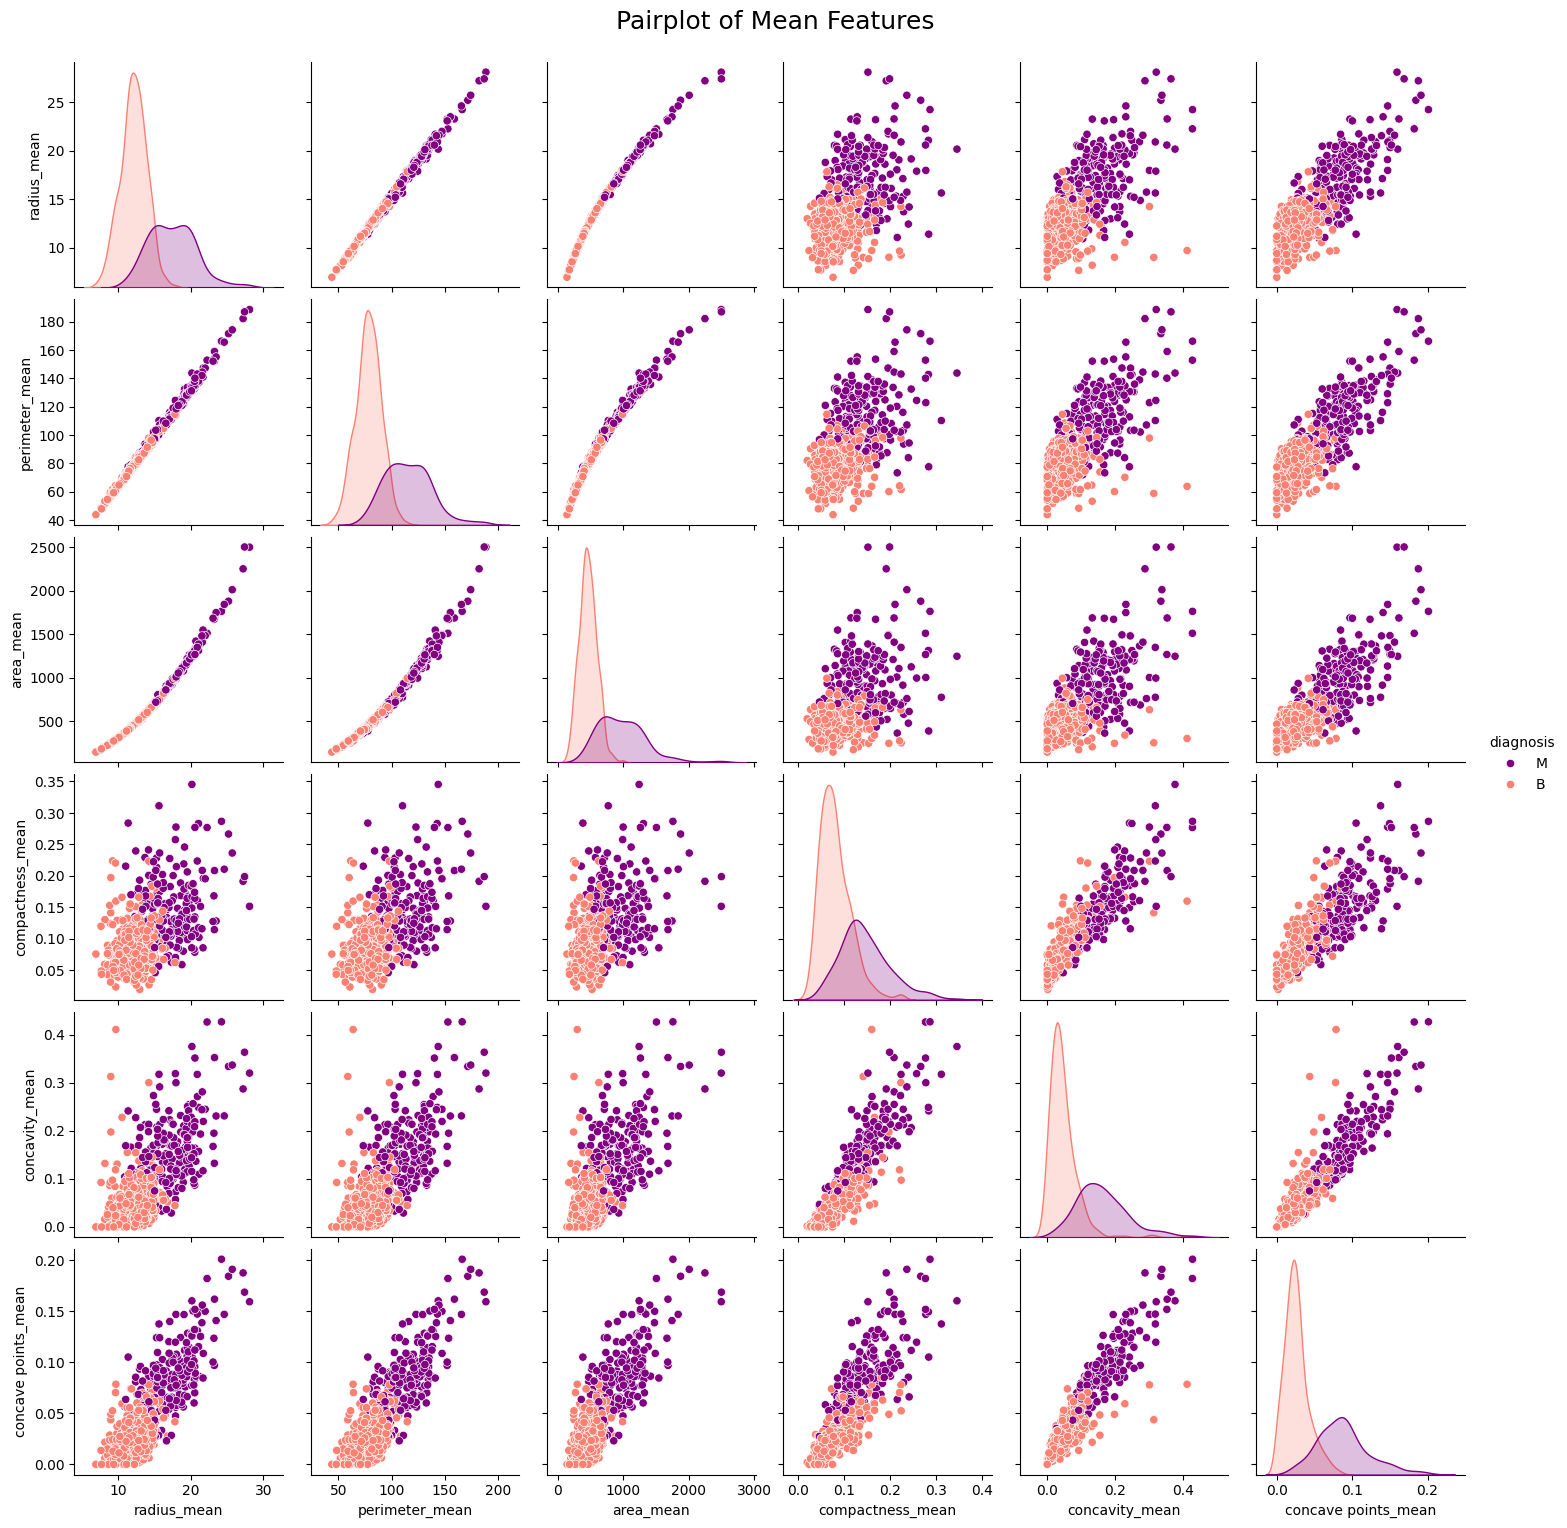

In [31]:
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
sns.pairplot(cancerdata, hue='diagnosis', vars=features, palette={'M': 'purple', 'B': 'salmon'})
plt.suptitle("Pairplot of Mean Features", y=1.02, size=18)
plt.show()

### 📊 Analysis of the Pairplot

This **pairplot** visualizes the relationships between multiple tumor features (`radius_mean`, `perimeter_mean`, `area_mean`, `compactness_mean`, `concavity_mean`, `concave points_mean`) in the **cancer dataset**, with the tumor diagnosis (`M` for Malignant, `B` for Benign) as the hue.

---

### 🔎 Observations:
1. **Strong Correlation Between `radius_mean`, `perimeter_mean`, and `area_mean`**  
   - These three features show a **highly linear relationship**.
   - This suggests that they carry redundant information, and one of them could be enough for classification.
  
2. **Malignant (`M`, Purple) vs. Benign (`B`, Salmon) Separation**  
   - In most scatter plots, **malignant tumors tend to have larger values** for these features compared to benign ones.
   - The separation is clear, indicating that these features are important for classification.

3. **Histograms on the Diagonal**  
   - The diagonal represents the **distribution of each individual feature**.
   - Malignant tumors generally have a **wider spread** (more variability), whereas benign tumors are more concentrated in lower ranges.

4. **Compactness, Concavity, and Concave Points**  
   - These features **also show separation**, but with **more overlap** between benign and malignant cases.
   - Malignant cases tend to have higher concavity-related values.

---

### 🚀 Insights & Next Steps
✅ **Feature Selection:** Since `radius_mean`, `perimeter_mean`, and `area_mean` are correlated, PCA or feature reduction techniques may be useful.  
✅ **Classification Potential:** Features show clear separation between `M` and `B`, making them strong candidates for machine learning models.  
✅ **Outlier Detection:** Some points (especially in concavity-related plots) seem different from the main clusters, which may indicate **outliers**.  


The next step is generation of various ML models for the prediction of cancer subtype.

Visit this repository for performing Machine learning on the Breast Cancer data set:

📌 **Repository Link:** [ML Model Generation for the cancer subtype classification](https://github.com/kurshid1991/Breastcancer_ML-modelling)
